In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5704983396927958847
xla_global_id: -1
]


In [34]:
tf.test.is_gpu_available('GPU')

False

In [35]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [36]:
data_dir = "Animal_Classification"

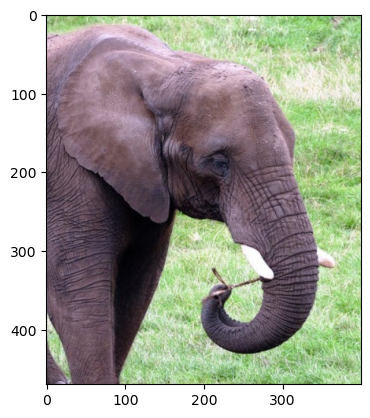

In [37]:
img = cv2.imread(os.path.join(data_dir, 'Elephant', 'Elephant_275.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

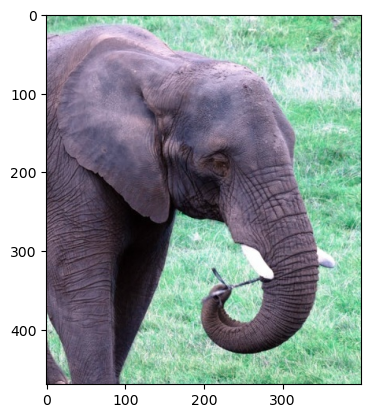

In [38]:
plt.imshow(img)

In [39]:
print(os.listdir(os.path.join(data_dir, 'Elephant')))

['Elephant_554.jpg', 'Elephant_760.jpg', 'Elephant_831.jpg', 'Elephant_66.jpg', 'Elephant_387.jpg', 'Elephant_747.jpg', 'Elephant_878.jpg', 'Elephant_589.jpg', 'Elephant_65.jpg', 'Elephant_469.jpg', 'Elephant_444.jpg', 'Elephant_338.jpg', 'Elephant_402.jpg', 'Elephant_195.jpg', 'Elephant_454.jpg', 'Elephant_550.jpg', 'Elephant_102.jpg', 'Elephant_464.jpg', 'Elephant_25.jpg', 'Elephant_925.jpg', 'Elephant_213.jpg', 'Elephant_78.jpg', 'Elephant_845.jpg', 'Elephant_627.jpg', 'Elephant_959.jpg', 'Elephant_599.jpg', 'Elephant_144.jpg', 'Elephant_26.jpg', 'Elephant_367.jpg', 'Elephant_241.jpg', 'Elephant_57.jpg', 'Elephant_160.jpg', 'Elephant_638.jpg', 'Elephant_231.jpg', 'Elephant_895.jpg', 'Elephant_796.jpg', 'Elephant_734.jpg', 'Elephant_786.jpg', 'Elephant_743.jpg', 'Elephant_672.jpg', 'Elephant_164.jpg', 'Elephant_896.jpg', 'Elephant_960.jpg', 'Elephant_303.jpg', 'Elephant_603.jpg', 'Elephant_547.jpg', 'Elephant_389.jpg', 'Elephant_513.jpg', 'Elephant_657.jpg', 'Elephant_225.jpg', 'Elep

## 1. Preprocess

### 1.1 Load Data

In [40]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4019 files belonging to 4 classes.


In [41]:
data_iterator = data.as_numpy_iterator()

In [42]:
batch = data_iterator.next()

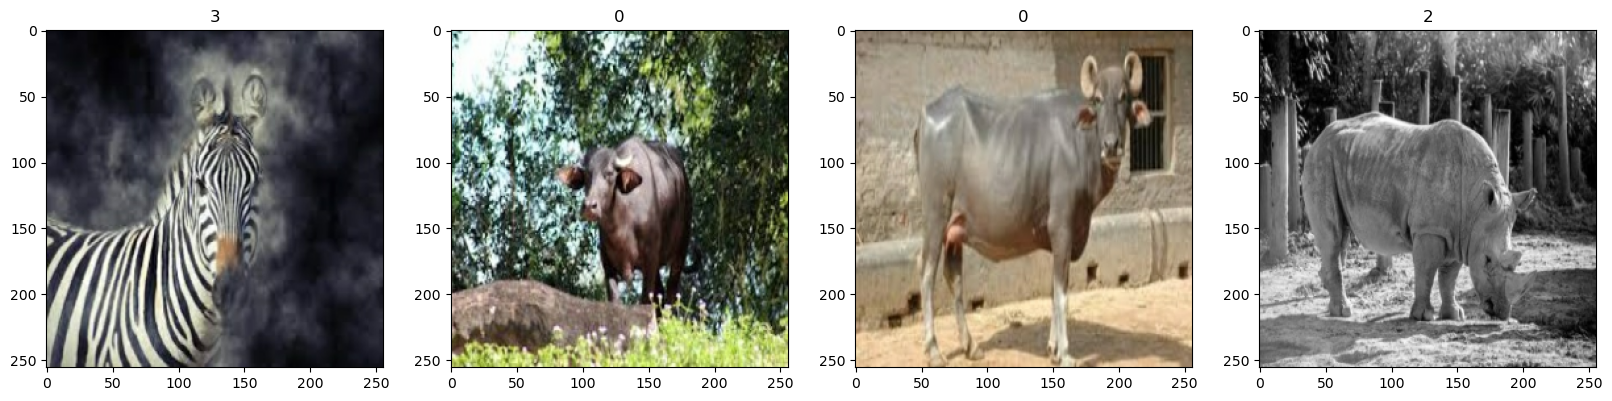

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 1.2 Scale Data

In [44]:
data = data.map(lambda x,y: (x/255,y))

In [45]:
scaled_iterator = data.as_numpy_iterator()

In [46]:
batch = scaled_iterator.next()

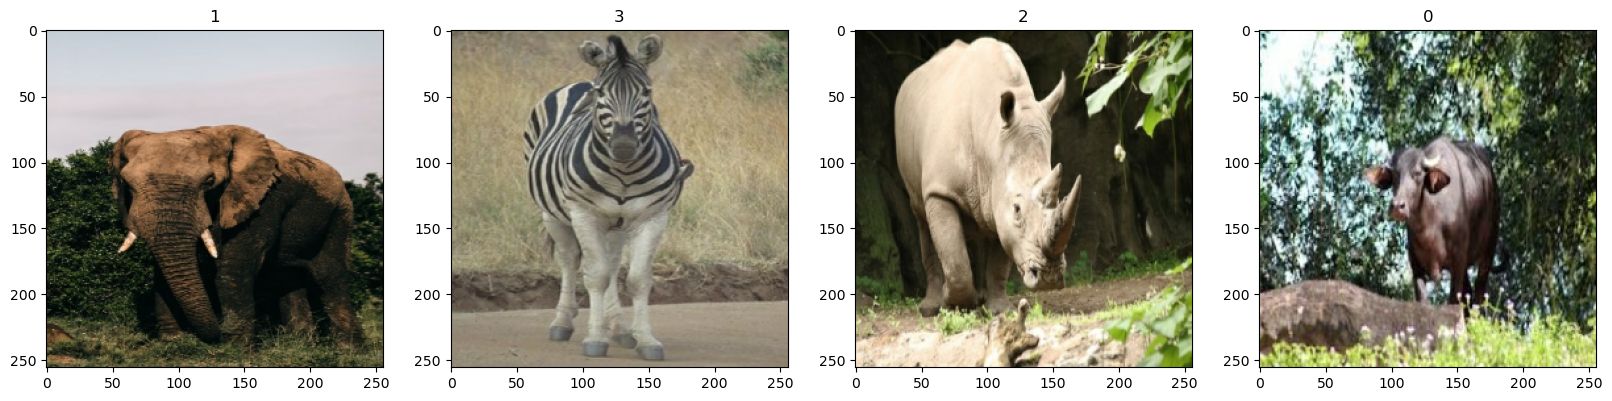

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

### 1.3 Split Data

In [48]:
len(data)

126

In [49]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [50]:
train_size

89

In [51]:
val_size

25

In [52]:
test_size

12

In [53]:
train_size+val_size+test_size

126

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 2. Build & Train

### 2.1 Build Model

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

model = Sequential()

In [56]:
# Layer 1
model.add(Conv2D(100, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Layer 2
model.add(Conv2D(150, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 3
model.add(Conv2D(100, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 2
model.add(Conv2D(150, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 3
model.add(Conv2D(100, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.8))
model.add(Dense(4, activation='softmax'))

In [57]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 150)  │       135,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 100)    │       135,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 150)    │       135,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 100)    │       135,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       921,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,184 (5.59 MB)

 Trainable params: 1,466,184 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

### 2.2 Train Model

In [59]:
import tensorflow as tf

# class CustomAccuracyThreshold(tf.keras.callbacks.Callback):
#     def __init__(self, threshold=0.97):
#         super().__init__()
#         self.threshold = threshold

#     def on_epoch_end(self, epoch, logs=None):
#         if logs['accuracy'] >= self.threshold:
#             print(f"Reached accuracy threshold ({self.threshold:.2f}). Stopping training.")
#             self.model.stop_training = True

logdir='logs'
valLoss_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
accr_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


# custom_callback = CustomAccuracyThreshold(threshold=0.97)
callbacks = [tensorboard_callback, valLoss_stop, accr_stop]

hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 428s 5s/step - accuracy: 0.2970 - loss: 1.3359 - val_accuracy: 0.2475 - val_loss: 1.3891
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 489s 6s/step - accuracy: 0.2930 - loss: 1.3706 - val_accuracy: 0.4850 - val_loss: 1.0480
Epoch 3/20
29/89 ━━━━━━━━━━━━━━━━━━━━ 5:27 5s/step - accuracy: 0.4928 - loss: 1.0567

KeyboardInterrupt: 

## 3. Evaluation

### 3.1 Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 3.2 Validation

In [ ]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    
    # Convert predictions to class indices
    yhat = tf.argmax(yhat, axis=1)
    
    # Update metrics
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

### 3.3 Testing

In [ ]:
img = cv2.imread('Buffalo_806.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
test = model.predict(np.expand_dims(resize/256, 0))

In [ ]:
test